Training Part 1:

In [1]:
# Before using YOLO model, We need to Install Ultralytics

!pip install ultralytics

# Now we can use YOLOv11, so we store it to model

from ultralytics import YOLO

model = YOLO("yolo11n.pt")

# Next is our dataset, to import we can take the zip direct from our roboflow account

!curl -L "https://app.roboflow.com/ds/rca8mDhGMR?key=4oZ0PwlD9C" > myDataset.zip # -L to redirect to new link, didn't knew that!

!unzip myDataset.zip -d Dataset # -d for Directory

# Now we can train YOLOv8 for our dataset

results = model.train(data="/content/Dataset/data.yaml", epochs=50, imgsz=640, batch=16)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   1865      0 --:--:-- --:--:-- --:--:--  1863
100 21.2M  100 21.2M    0     0  6269k      0  0:00:03  0:00:03 --:--:--  9.8M
Archive:  myDataset.zip
  inflating: Dataset/README.dataset.txt  
  inflating: Dataset/README.roboflow.txt  
  inflating: Dataset/data.yaml       
   creating: Dataset/test/
   creating: Dataset/test/images/
 extracting: Dataset/test/images/Image-101-_jpg.rf.68c5b55e1820f620a3eb6cbaba1f3fd3.jpg 

In [2]:
# # For validation, we can run call

# val_result = model.val(data="/content/Dataset/data.yaml")
# print(val_result)

# Now for prediction,

predict_result = model.predict(source="/content/Dataset/test/images", imgsz=640, conf=0.50, save=True) # shows label only > 50%


image 1/20 /content/Dataset/test/images/Image-101-_jpg.rf.68c5b55e1820f620a3eb6cbaba1f3fd3.jpg: 512x640 1 Display, 51.6ms
image 2/20 /content/Dataset/test/images/Image-118-_jpg.rf.d3aba422d14b2877a837fab37968159b.jpg: 512x640 1 Display, 9.1ms
image 3/20 /content/Dataset/test/images/Image-142-_jpg.rf.a75be472d8144129fba68548a843e12c.jpg: 512x640 2 Batterys, 1 Display, 9.0ms
image 4/20 /content/Dataset/test/images/Image-164-_jpg.rf.10386e85f14a4f5270d53fd6b1fb95b4.jpg: 512x640 1 Motor, 8.9ms
image 5/20 /content/Dataset/test/images/Image-167-_jpg.rf.eb9aff4aba2203dac904e39f56186fe7.jpg: 640x512 1 Motor, 58.3ms
image 6/20 /content/Dataset/test/images/Image-17-_jpg.rf.ba8327ff7f4c9a8b5006b2a83166b267.jpg: 512x640 1 Arduino, 9.1ms
image 7/20 /content/Dataset/test/images/Image-187-_jpg.rf.fbffba36faffccf3f128ede34e54fb7d.jpg: 512x640 1 Motor, 1 sensor, 8.5ms
image 8/20 /content/Dataset/test/images/Image-194-_jpg.rf.649889830d5f52c56a65b9aea29ca1af.jpg: 512x640 2 Batterys, 1 Motor, 9.9ms
imag

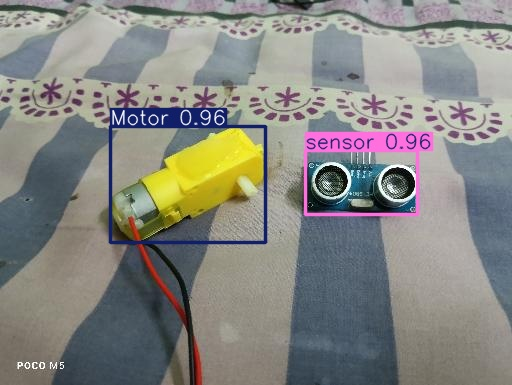

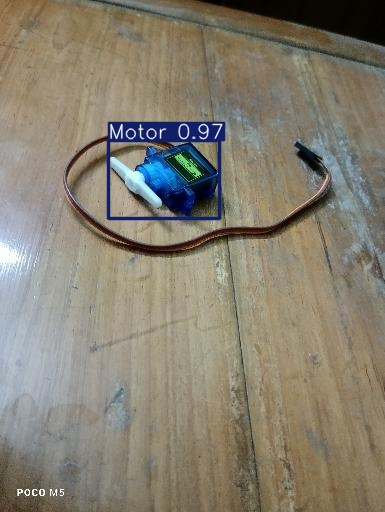

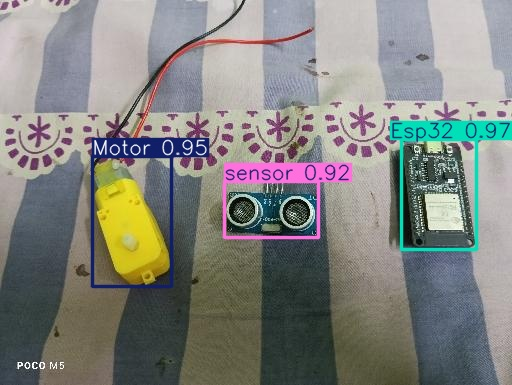

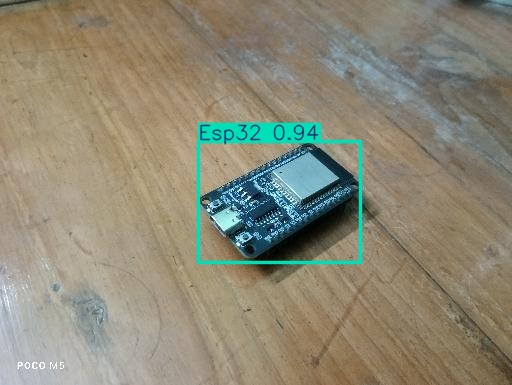

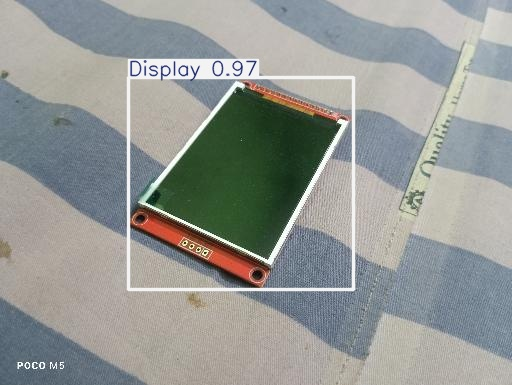

In [3]:
# Lastly for training 1, the output is,

import glob
from IPython.display import Image, display

pred_images = glob.glob("runs/detect/predict/*.jpg") # To filter all .jpg files
for img_path in pred_images[:5]: # First 5 images, else it will open 50 at once
  display(Image(filename=img_path))

Training Part 2:

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

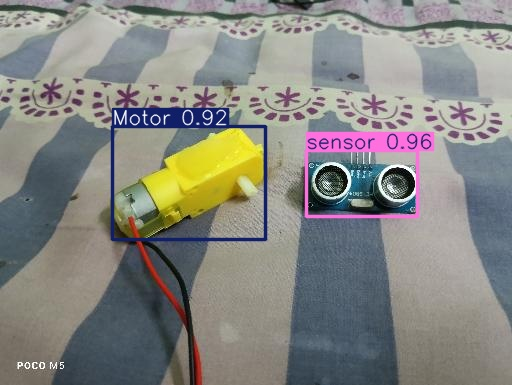

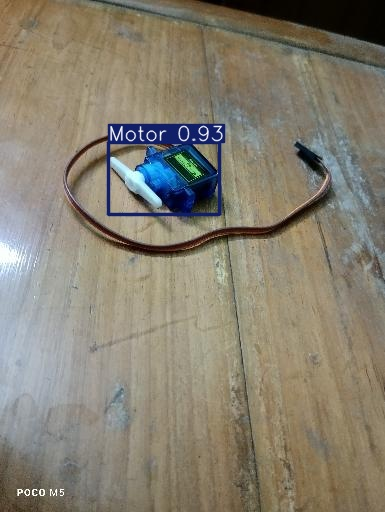

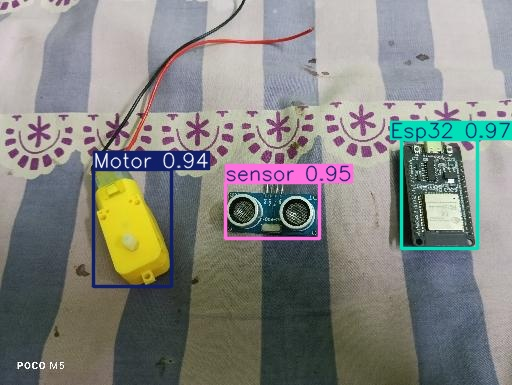

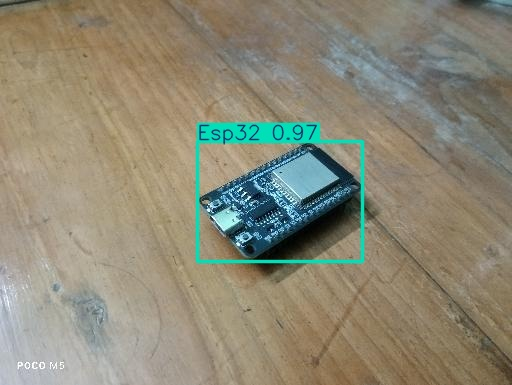

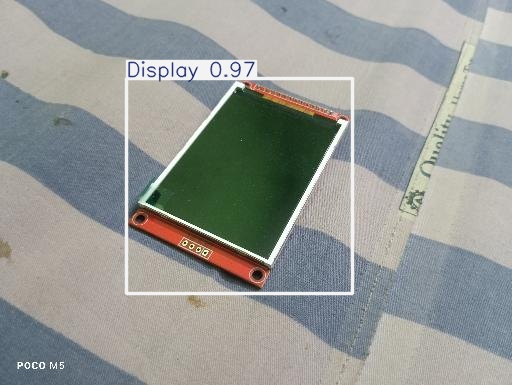

In [4]:
model2 = YOLO("yolov8n.pt")

results2 = model2.train(data="/content/Dataset/data.yaml", epochs=100, imgsz=640, batch=32)

predict_result2 = model2.predict(source="/content/Dataset/test/images", imgsz=640, conf=0.70, save=True) # shows label only > 70%

# Lastly for training 2, the output is,

import glob
from IPython.display import Image, display

pred_images = glob.glob("runs/detect/predict2/*.jpg")
for img_path in pred_images[:5]:
  display(Image(filename=img_path))

In [5]:
!cp runs/detect/train2/weights/best.pt electronics_yolo_final_v2.pt

from google.colab import files
files.download("electronics_yolo_final_v2.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>